# <h1 align="center">Trabajo Practico 1: UdeSA Panoramica</h1>

In [2]:
import matplotlib.pyplot as plt
import cv2
from i308_utils import imshow, show_images

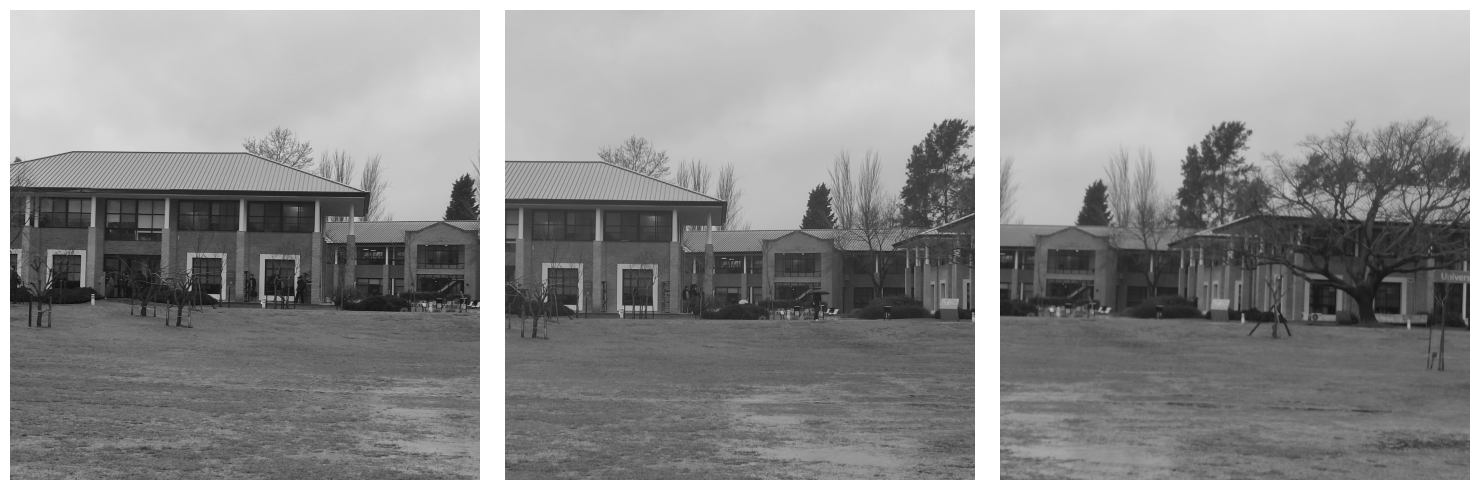

In [3]:
images = [cv2.cvtColor(plt.imread(f'img/udesa_{i}.jpg'), cv2.COLOR_RGB2GRAY) for i in range(0,3)]
show_images(images, figsize=(15,5))

## Deteccion y Descripcion de Caracteristicas Visuales

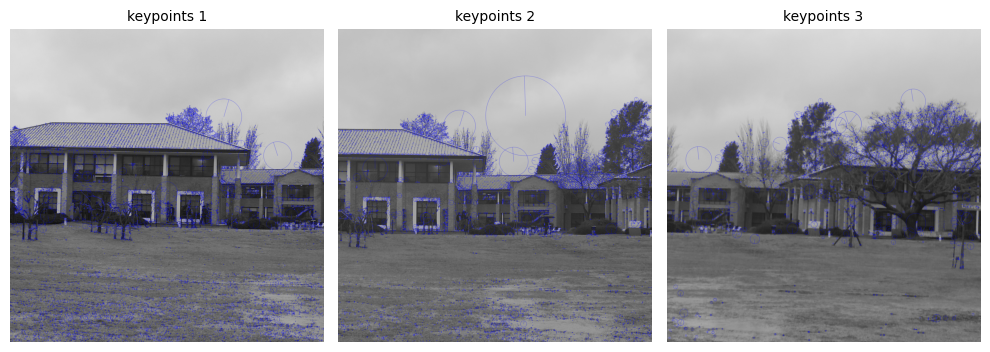

In [4]:
sift_algo = cv2.SIFT_create()
images_keypoints = []
images_descriptors = []

for i in range(len(images)):
    kp, des = sift_algo.detectAndCompute(images[i], None)
    images_keypoints.append(kp)
    images_descriptors.append(des)

images_with_kp = []
for i in range(len(images)):
    img_bgr = cv2.cvtColor(images[i], cv2.COLOR_GRAY2BGR)
    img_with_kp = cv2.drawKeypoints(
        img_bgr,
        images_keypoints[i],
        0, (255, 0, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    images_with_kp.append(img_with_kp)

show_images(images_with_kp, ["keypoints 1", "keypoints 2", "keypoints 3"])



## Asociacion de Caracteristicas

### Cross-check

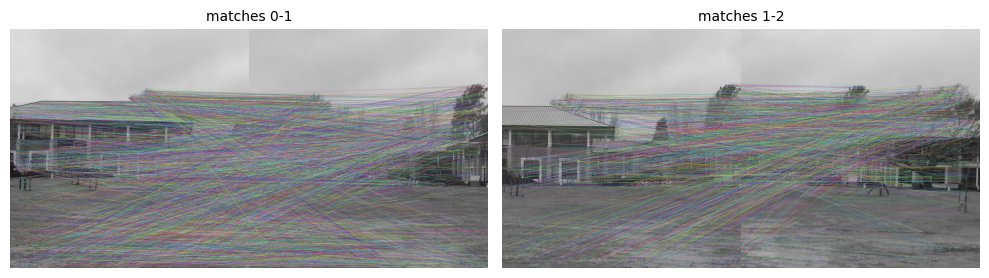

In [12]:
bf_cross = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match between image 0 and image 1
matches01 = bf_cross.match(images_descriptors[0], images_descriptors[1])
matches01 = sorted(matches01, key=lambda x: x.distance)

matched_img01_cross = cv2.drawMatches(
    images[0], images_keypoints[0], 
    images[1], images_keypoints[1], 
    matches01, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Match between image 1 and image 2
matches12 = bf_cross.match(images_descriptors[1], images_descriptors[2])
matches12 = sorted(matches12, key=lambda x: x.distance)

matched_img12_cross = cv2.drawMatches(
    images[1], images_keypoints[1], 
    images[2], images_keypoints[2], 
    matches12, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

show_images([matched_img01_cross, matched_img12_cross], ["matches 0-1", "matches 1-2"])


### Lowe´s Ratio

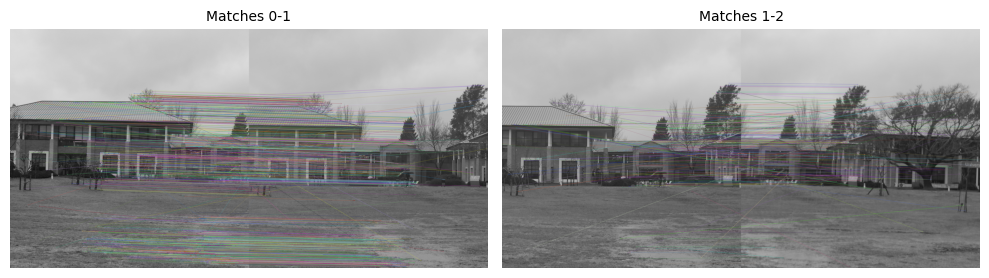

In [11]:
bf_lowe = cv2.BFMatcher(cv2.NORM_L2)

matches01 = bf_lowe.knnMatch(images_descriptors[0], images_descriptors[1], k=2)
good_matches01 = []

for m, n in matches01:
    if m.distance < 0.75 * n.distance:
        good_matches01.append(m)

matched_img01_lowe = cv2.drawMatches(
    images[0], images_keypoints[0],
    images[1], images_keypoints[1],
    good_matches01, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)


matches12 = bf_lowe.knnMatch(images_descriptors[1], images_descriptors[2], k=2)
good_matches12 = []
for m, n in matches12:
    if m.distance < 0.75 * n.distance:
        good_matches12.append(m)

matched_img12_lowe = cv2.drawMatches(
    images[1], images_keypoints[1],
    images[2], images_keypoints[2],
    good_matches12, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

show_images([matched_img01_lowe, matched_img12_lowe], ["Matches 0-1", "Matches 1-2"])

### Cross-check vs Lowe´s Ratio

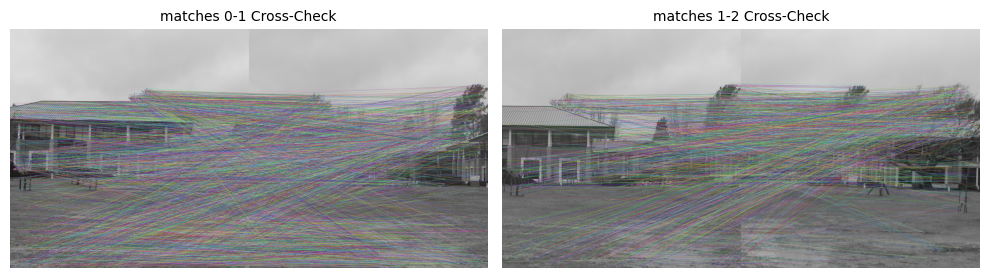

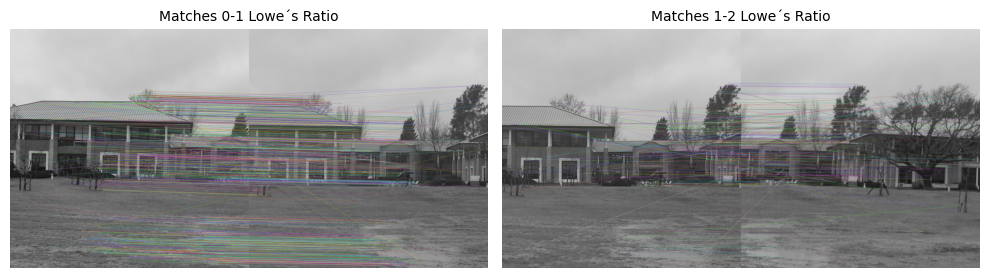

In [13]:
show_images([matched_img01_cross, matched_img12_cross], ["matches 0-1 Cross-Check", "matches 1-2 Cross-Check"])
show_images([matched_img01_lowe, matched_img12_lowe], ["Matches 0-1 Lowe´s Ratio", "Matches 1-2 Lowe´s Ratio"])